In [63]:

import tensorflow as tf
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import cv2
import os

In [3]:
!dir "C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD"


 Volume in drive C is Windows
 Volume Serial Number is 9048-2C9E

 Directory of C:\Users\91956\yolov10-env\BCCD_Dataset\BCCD

14-11-2024  08:04 PM    <DIR>          .
14-11-2024  07:24 PM    <DIR>          ..
14-11-2024  07:10 PM    <DIR>          Annotations
14-11-2024  07:10 PM    <DIR>          ImageSets
14-11-2024  07:11 PM    <DIR>          JPEGImages
14-11-2024  08:04 PM    <DIR>          labels
               0 File(s)              0 bytes
               6 Dir(s)   1,933,819,904 bytes free


In [4]:
train_df = pd.read_csv("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/ImageSets/Main/train.txt", sep = " ", header=None)
val_df =pd.read_csv("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/ImageSets/Main/val.txt", sep = " ", header=None)

In [5]:
train_df.head()

0
0  BloodImage_00001
1  BloodImage_00003
2  BloodImage_00004
3  BloodImage_00005
4  BloodImage_00006

In [6]:
val_df.head()

0
0  BloodImage_00000
1  BloodImage_00002
2  BloodImage_00014
3  BloodImage_00017
4  BloodImage_00028

In [7]:
images_path = os.listdir("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages")
len(images_path)

364

In [8]:

def show_images():
    plt.figure(figsize=(15,5))  # Adjust the size of the figure for horizontal display
    for i in range(10):  # Loop to display 10 images
        n = np.random.choice(364, 1)  # Randomly choose an image index
        n = n[0]  # Extract the single value from the array
        plt.subplot(2, 5, i+1)  # 2 rows, 5 columns to display images horizontally
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.grid(False)  # Remove gridlines
        image = plt.imread(os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages", images_path[int(n)]))
        plt.imshow(image)  # Show the image
    plt.show()




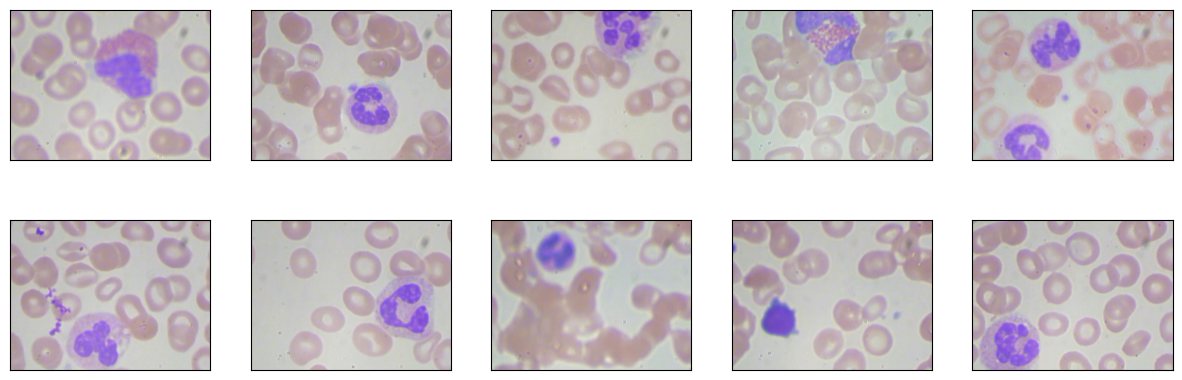

In [9]:
show_images()

In [10]:
# Total number of train and validation images
len(train_df[0].tolist()), len(val_df[0].tolist())

(205, 87)

In [11]:
for path in train_df[0].tolist():
    image_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages", path + ".jpg")
    annotation_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/Annotations", path + ".xml")
    i_path = os.path.join("C:/Users/91956/yolov10-env/images/train", path + ".jpg")
    a_path = os.path.join("C:/Users/91956/yolov10-env/images/train", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [12]:
for path in val_df[0].tolist():
    image_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages", path + ".jpg")
    annotation_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/Annotations", path + ".xml")
    i_path = os.path.join("C:/Users/91956/yolov10-env/images/test", path + ".jpg")
    a_path = os.path.join("C:/Users/91956/yolov10-env/images/test", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)



In [13]:
len(os.listdir("C:/Users/91956/yolov10-env/images/train")),len(os.listdir("C:/Users/91956/yolov10-env/images/test"))


(411, 262)

In [14]:
# copy the annotation files of the training images
for path in train_df[0].tolist():
    image_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/Annotations", path + ".xml")
    p = os.path.join("C:/Users/91956/yolov10-env/images/train", path + ".xml")
    shutil.copy2(image_path, p)

In [15]:
for path in val_df[0].tolist():
    path = path.split(".")[0] + ".xml"
    image_path = os.path.join("C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/Annotations", path)
    p = os.path.join("C:/Users/91956/yolov10-env/images/test", path + ".xml")
    shutil.copy2(image_path, p)


In [16]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    # List to store extracted values from XML files
    xml_list = []
    
    # Loop through each XML file in the specified directory
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        # Extract relevant information for each object in the XML
        for member in root.findall('object'):
            value = (
                root.find('filename').text,               # Image filename
                int(root.find('size')[0].text),           # Image width
                int(root.find('size')[1].text),           # Image height
                member.find('name').text,                 # Class label
                int(member.find('bndbox/xmin').text),     # xmin of bounding box
                int(member.find('bndbox/ymin').text),     # ymin of bounding box
                int(member.find('bndbox/xmax').text),     # xmax of bounding box
                int(member.find('bndbox/ymax').text)      # ymax of bounding box
            )
            xml_list.append(value)
    
    # Define column names and create a DataFrame
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

def main():
    # Ensure the folder structure is correct
    for directory in ['train', 'test']:
        # Adjust the path to the directory where XML annotations are stored
        image_path = os.path.join(os.getcwd(), 'images', directory)
        
        # Convert XML files in each directory to a CSV file
        xml_df = xml_to_csv(image_path)
        csv_filename = f"{directory}_labels.csv"   # Define the CSV filename
        
        # Save the DataFrame to a CSV file
        xml_df.to_csv(csv_filename, index=False)
        print(f'Successfully converted XML files in {directory} to {csv_filename}')

# Run the main function
main()



Successfully converted XML files in train to train_labels.csv
Successfully converted XML files in test to test_labels.csv


In [17]:
train_labels = pd.read_csv("train_labels.csv")
test_labels = pd.read_csv("test_labels.csv")

In [18]:
train_labels["class"].value_counts()

class
RBC          2382
WBC           214
Platelets     209
Name: count, dtype: int64

In [19]:
test_labels["class"].value_counts()

class
RBC          1936
WBC           174
Platelets     166
Name: count, dtype: int64

In [20]:
import sys
sys.path.append('C:/Users/91956/models/research')
sys.path.append('C:/Users/91956/models/research/slim')


In [30]:
from absl import flags
import os 
import io
import pandas as pd
import tensorflow as tf
from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple



def class_text_to_int(row_label):
    if row_label == 'RBC':
        return 1
    elif row_label == 'WBC':
        return 2
    elif row_label == 'Platelets':
        return 3
    else:
        return None

# Group data based on filenames
def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

# Create a TensorFlow example from the grouped data
def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins, xmaxs, ymins, ymaxs = [], [], [], []
    classes_text, classes = [], []

    for _, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

# Main function to generate TFRecord
def main():
    writer = tf.io.TFRecordWriter(FLAGS.output_path)
    path = FLAGS.image_dir
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')

    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    print(f'Successfully created the TFRecords: {FLAGS.output_path}')

# Run the main function directly
if __name__ == '__main__':
    flags.FLAGS([''])  # Parses flags
    main()










Successfully created the TFRecords: C:/Users/91956/yolov10-env/train.record


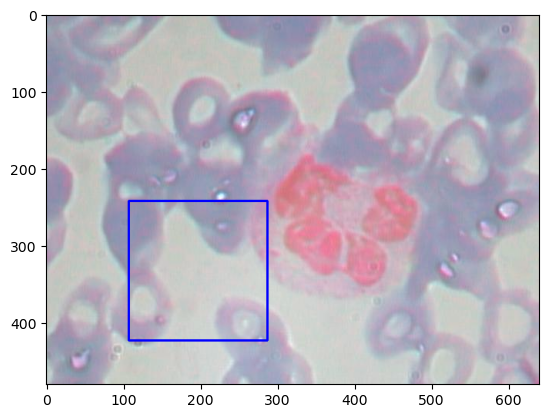

In [31]:

image_1 = cv2.imread('C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)
cv2.rectangle(image_1, (107, 242), (287, 423), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()


In [36]:
!pip install tf-slim


   ---------------------------------------- 0.0/352.1 kB ? eta -:--:--
   --- ------------------------------------ 30.7/352.1 kB 1.3 MB/s eta 0:00:01
   --- ------------------------------------ 30.7/352.1 kB 1.3 MB/s eta 0:00:01
   ------ -------------------------------- 61.4/352.1 kB 544.7 kB/s eta 0:00:01
   ------ -------------------------------- 61.4/352.1 kB 544.7 kB/s eta 0:00:01
   ------------- ------------------------ 122.9/352.1 kB 514.3 kB/s eta 0:00:01
   ---------------------- --------------- 204.8/352.1 kB 731.4 kB/s eta 0:00:01
   ---------------------------------- --- 317.4/352.1 kB 936.6 kB/s eta 0:00:01
   -------------------------------------- 352.1/352.1 kB 952.3 kB/s eta 0:00:00


In [40]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import time
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

tf.compat.v1.disable_eager_execution()


PATH_TO_FROZEN_GRAPH = 'C:/Users/91956/Downloads/frozen_inference_graph (1).pb'

# List of the strings that is used to add correct label for each box
PATH_TO_LABELS = 'C:/Users/91956/Downloads/label_map.pbtxt'
test_df = pd.read_csv('C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/ImageSets/Main/test.txt', header=None)
test_df.head()

0
0  BloodImage_00007
1  BloodImage_00011
2  BloodImage_00015
3  BloodImage_00016
4  BloodImage_00018

In [41]:
test_images = test_df[0].map(lambda x: x + ".jpg").tolist()
test_images[:10]

['BloodImage_00007.jpg',
 'BloodImage_00011.jpg',
 'BloodImage_00015.jpg',
 'BloodImage_00016.jpg',
 'BloodImage_00018.jpg',
 'BloodImage_00019.jpg',
 'BloodImage_00021.jpg',
 'BloodImage_00031.jpg',
 'BloodImage_00033.jpg',
 'BloodImage_00041.jpg']

In [51]:
test_image = str(np.random.choice(test_images, 1)[0])
test_image

'BloodImage_00098.jpg'

In [53]:
# Randomly choose an image from the list
test_image = 'BloodImage_00098.jpg'  # This is your randomly selected image

# Construct the full path
test_image_path = "C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages/" + test_image

# Print the path to verify
print("Constructed Image Path: ", test_image_path)

# Open the image (ensure this file exists at the given location)
try:
    image = Image.open(test_image_path)
    image.show()
except FileNotFoundError:
    print(f"Error: File not found at {test_image_path}")


Constructed Image Path:  C:/Users/91956/yolov10-env/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00098.jpg


In [54]:
start = time.time()
detection_graph = tf.compat.v1.Graph()

with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

print("Graph loaded in {} seconds".format(time.time() - start))

Graph loaded in 2.6720099449157715 seconds


In [55]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [56]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [57]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        # Get handles to input and output tensors
        ops = tf.compat.v1.get_default_graph().get_operations()
        all_tensor_names = {output.name for op in ops for output in op.outputs}
        tensor_dict = {}

        for key in [
            'num_detections', 'detection_boxes', 'detection_scores',
            'detection_classes', 'detection_masks'
        ]:
            tensor_name = key + ':0'
            if tensor_name in all_tensor_names:
                tensor_dict[key] = tf.compat.v1.get_default_graph().get_tensor_by_name(tensor_name)

        if 'detection_masks' in tensor_dict:
            # The following processing is only for single image
            detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
            detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
            real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
            detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
            detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
            detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                detection_masks, detection_boxes, image.shape[1], image.shape[2])
            detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
            tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)

        image_tensor = tf.compat.v1.get_default_graph().get_tensor_by_name('image_tensor:0')

        # Run inference
        output_dict = tf.compat.v1.Session().run(tensor_dict, feed_dict={image_tensor: image})

        # Convert output to numpy arrays
        output_dict['num_detections'] = int(output_dict['num_detections'][0])
        output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.int64)
        output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
        output_dict['detection_scores'] = output_dict['detection_scores'][0]

        return output_dict


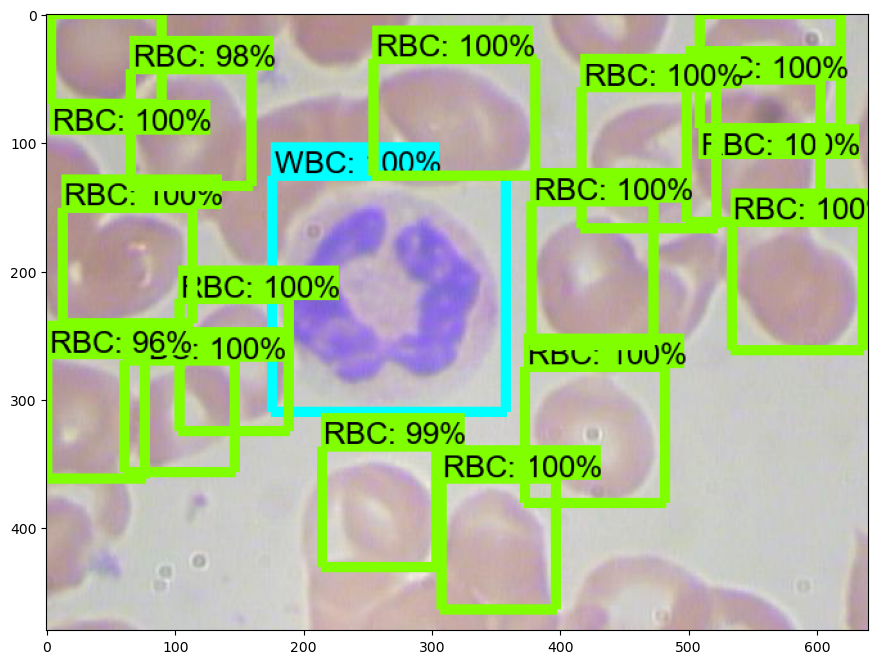

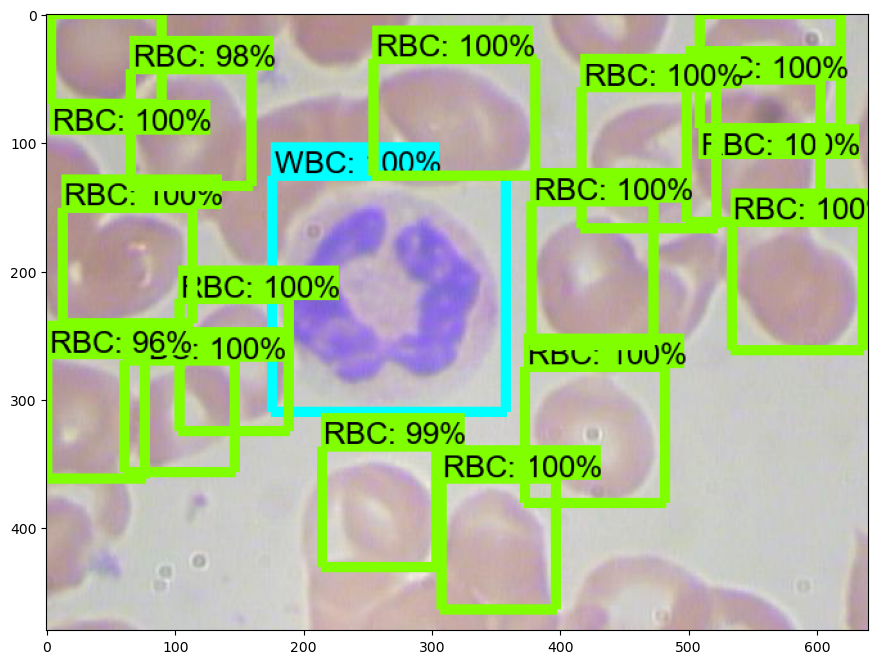

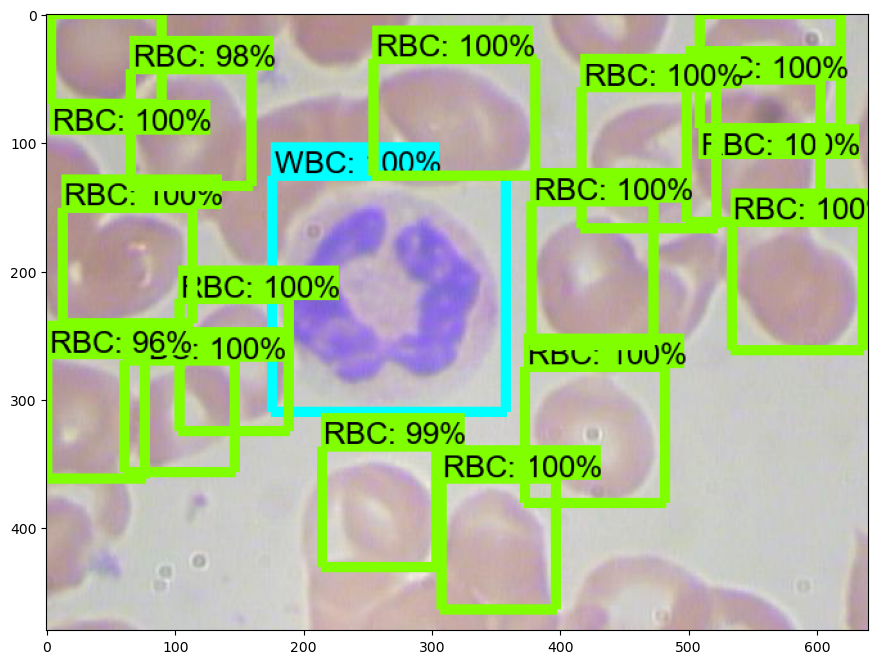

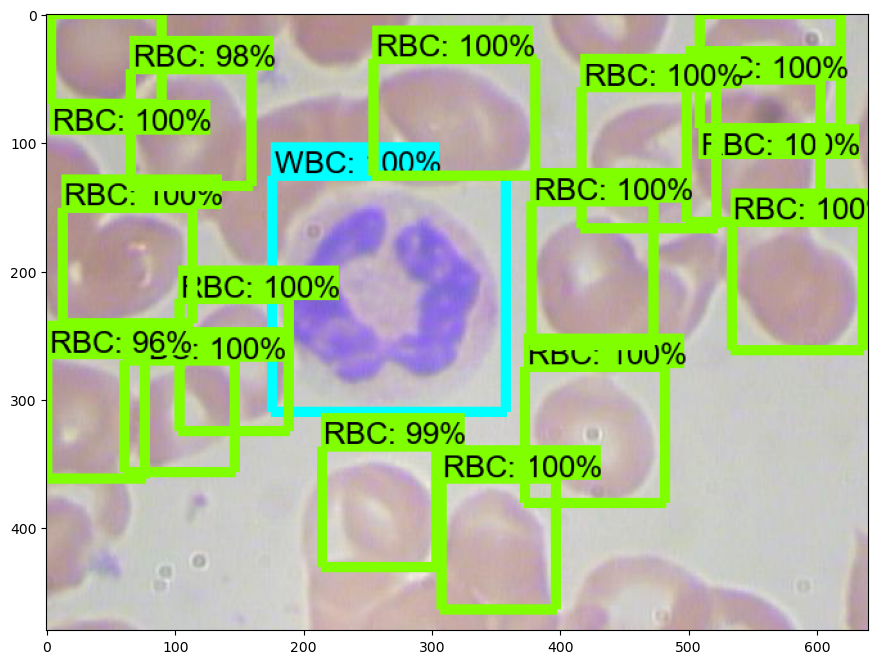

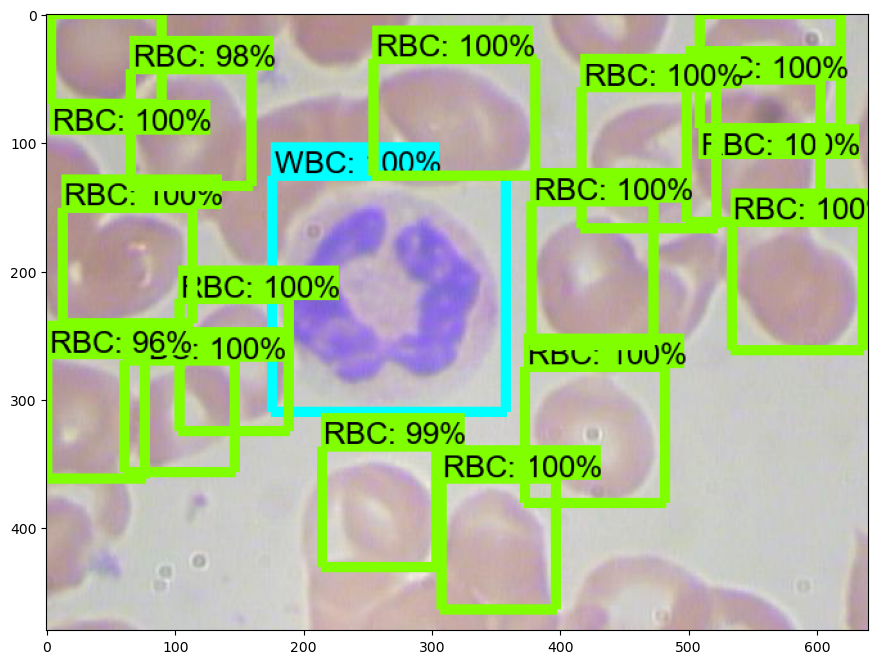

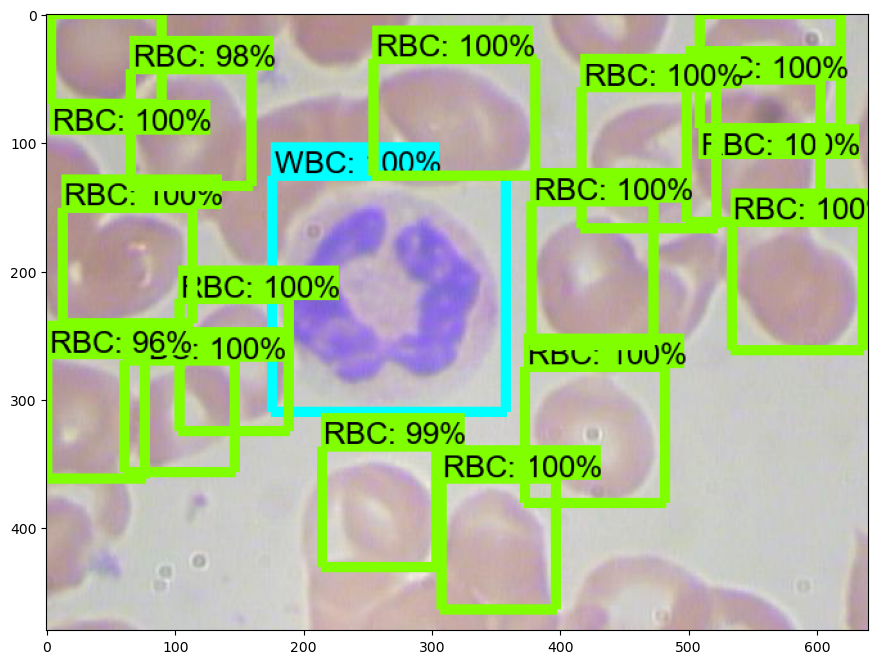

In [64]:
image = Image.open(test_image_path)


# Convert image to numpy array
image_np = load_image_into_numpy_array(image)

# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)

# Run inference
output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)

# Visualize the results of detection
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8)

# Display the result
plt.figure(figsize=(12,8))
plt.imshow(image_np)
plt.show()


In [4]:
import tensorflow as tf

# Define your input shape and number of classes
input_shape = 784  # Example input shape (e.g., 784 for MNIST)
num_classes = 10   # Example number of output classes (e.g., 10 classes for MNIST)

# Define your model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),  # Use Input layer instead of passing input_shape to Dense
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Replace num_classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have x_train and y_train for training data
# Train your model (replace with your own data)
# model.fit(x_train, y_train, epochs=5)

# Save the model after training
model_save_path = 'saved_model_directory'  # Specify the directory where you want to save your model
tf.saved_model.save(model, model_save_path)

print(f'Model has been saved to {model_save_path}')


INFO:tensorflow:Assets written to: saved_model_directory\assets


INFO:tensorflow:Assets written to: saved_model_directory\assets


Model has been saved to saved_model_directory
